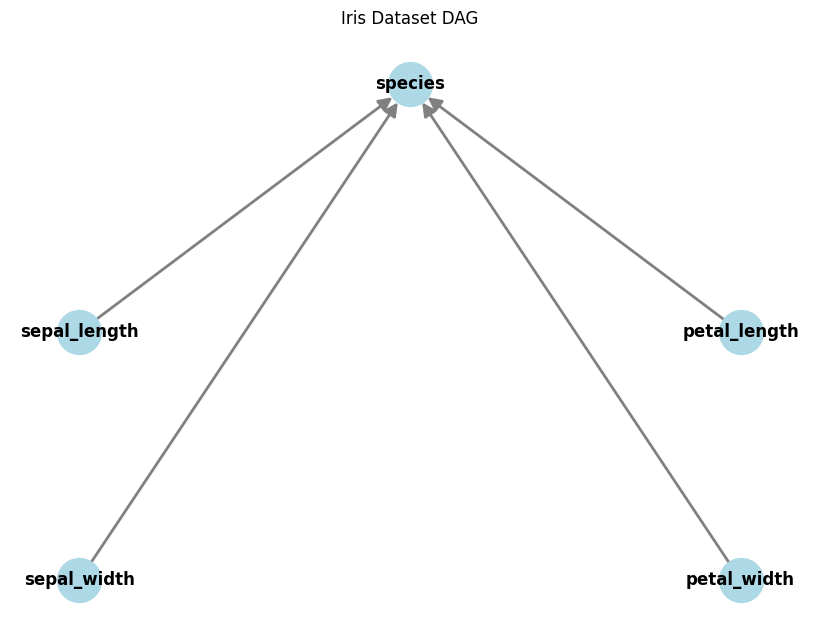

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a DAG
G = nx.DiGraph()

# Define the nodes (variables)
variables = [
    "sepal_length", "sepal_width",
    "petal_length", "petal_width",
    "species"  # Target variable
]

# Add nodes to the DAG
G.add_nodes_from(variables)

# Define the edges (conditional dependencies)
edges = [
    ("sepal_length", "species"),
    ("sepal_width", "species"),
    ("petal_length", "species"),
    ("petal_width", "species")
]

# Add edges to the DAG
G.add_edges_from(edges)

# Improved positions for better visualization
pos = {
    "sepal_length": (0, 1),
    "sepal_width": (0, 0),
    "petal_length": (1, 1),
    "petal_width": (1, 0),
    "species": (0.5, 2)
}

# Draw the DAG with improved settings
plt.figure(figsize=(8, 6))  # Set a larger figure size
options = {
    "node_color": "lightblue",
    "node_size": 1000,
    "font_size": 12,
    "font_color": "black",
    "font_weight": "bold",
    "edge_color": "gray",
    "width": 2,
    "arrows": True,
    "arrowsize": 20,
}
nx.draw(G, pos, with_labels=True, **options)
plt.title("Iris Dataset DAG")
plt.axis('off')  # Turn off the axis
plt.show()

